# *Definitive Guide to sklearn*

- Creador: &emsp;&emsp;&emsp;&emsp;&emsp; Ricardo Recarey Fernández [(LinkedIn)](https://www.linkedin.com/in/richyrecarey/)
- Creación: &emsp;&emsp;&emsp;&emsp;&emsp;2019-10-10  
- Última modificación: &nbsp;2019-10-10

In [14]:
# Imports básicos
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as color_maps
plt.style.use("ggplot")

# Modelos concretos 
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


# Preprocesado:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Transformaciones:
from sklearn.decomposition import PCA

# Selección de modelo:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.model_selection import GridSearchCV

# Métricas de validación:
from sklearn.metrics import make_scorer

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score


In [101]:
print("Python version: ", sys.version)
import sklearn; print("sklearn version:", sklearn.__version__)
print("pandas version: ", pd.__version__)
print("numpy version:  ", np.__version__)


Python version:  3.6.8 |Anaconda custom (64-bit)| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]
sklearn version: 0.20.3
pandas version:  0.24.2
numpy version:   1.16.2


The data has to be __numeric__ and stored as a numpy-like array (i.e., a type that is convertible to numeric array, like Pandas DataFrame for example) or SciPy sparse matrices. 

In [16]:
iris = datasets.load_iris()
digits = datasets.load_digits()

In [17]:
print(f"The type of iris is {type(iris)}\n")
print(f"The type of iris is {type(digits)}\n")
type(iris)

The type of iris is <class 'sklearn.utils.Bunch'>

The type of iris is <class 'sklearn.utils.Bunch'>



sklearn.utils.Bunch

A __bunch__ is a container object for datasets. It contains the following:

In [18]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [19]:
for i in dir(iris):
    print(type(iris[i]))

<class 'str'>
<class 'numpy.ndarray'>
<class 'list'>
<class 'str'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Obviamente, se puede ver que hay y de que forma son los datos de cada uno de los __bunchs__

In [20]:
print(digits.data.shape)
print("(filas, cols)")

(1797, 64)
(filas, cols)


# 1. Preprocesadro básico

## 1.1. Estandarización de los datos

La __estandarización__ y la __normalización__ son cosas distintas: [__Link__](https://stats.stackexchange.com/questions/10289/whats-the-difference-between-normalization-and-standardization)

- Por un lado la estandarización es (x-min)/(max-min). Lo que da lugar a que todos los datos se "estandarizarán" entre 0 y 1, dejando a los más "outliers" por arriba y por abajo en 1 y 0 respectivamente. Puede ser muy agresivo, pero por otra parte todos los datos tienen la misma escala positiva.

- Por otro lado la normalización sigue la ecuación de (x-mu)/sigma clásica, donde se resta la media y se divide por la desviación típica. Suele ser más __recomendada__ para la mayoría de casos de uso. Además, no obliga a todos los datos a estar entre 0 y 1 necesariamente, lo cual es más razonable.

In [21]:
# Cargamos un scaler: 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(iris.data)

# Una vez construido el scaler, podemos transformar los datos originales
std_iris = scaler.transform(iris.data)

# Comprobamos que efectivamente cada una de las 4 variables se ha estandarizado con el método escogido.
print(iris.data[1, :])
print(std_iris[1, :])

[4.9 3.  1.4 0.2]
[-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]


## 1.2. Normalización de los datos

In [22]:
# Cargamos otro scaler:
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(iris.data)

norm_iris = scaler.transform(iris.data)

# Comprobamos cambios
print(iris.data[1, :])
print(norm_iris[1, :])

[4.9 3.  1.4 0.2]
[0.82813287 0.50702013 0.23660939 0.03380134]


## 1.3. Binarización de los datos

In [23]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=0.0).fit(iris.data)
binary_iris = binarizer.transform(iris.data)

# Comprobamos cambios
print(iris.data[1, :])
print(binary_iris[1, :])

[4.9 3.  1.4 0.2]
[1. 1. 1. 1.]


## 1.4. Codificación de los datos

### 1.4.1. Pasar de objetos arbitrários a una etiqueta o código

In [24]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
encoded_target = enc.fit_transform(np.array(["hola","Hola","adios","adios"]))

In [25]:
encoded_target

array([2, 0, 1, 1], dtype=int64)

### 1.4.2. OneHotEncoder: Pasar a código multidimensional para no tener problemas de orden.

In [109]:
from sklearn.preprocessing import OneHotEncoder


# Tenemos la variable respuesta en y_train, con 3 posibles valores
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit_transform(y_train.reshape(-1,1)).toarray()[:5,:]

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

El problema es que así no sabríamos de una forma muy fácil a que se refiere cada una de las columnas.

In [128]:
# Lo convertimos en df y le ponemos la class
iris_df = pd.concat([pd.DataFrame(iris.data, columns = ['v1', 'v2', 'v3', 'v4']),
                     pd.DataFrame(iris.target, columns = ['Class'])],
                    axis = 1)
iris_df[:5]

,v1,v2,v3,v4,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [137]:
iris_df_OneHot = pd.concat([iris_df, 
                            pd.get_dummies(iris_df["Class"])], 
                           axis = 1)
iris_df_OneHot.iloc[[1,77,100],]

,v1,v2,v3,v4,Class,0,1,2
1,4.9,3.0,1.4,0.2,0,1,0,0
77,6.7,3.0,5.0,1.7,1,0,1,0
100,6.3,3.3,6.0,2.5,2,0,0,1


# 2. Decomposiciones - Transformaciones complejas:

## 2.1. PCA

Principal Component Analysis:

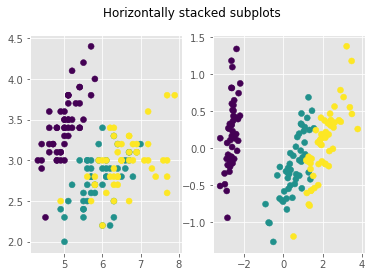

In [26]:
from sklearn.decomposition import PCA

# Creamos el constructor de PCA
pca = PCA(n_components=2)

# Lo fiteamos con nuestros datos, dándonos ya las proyecciones
pca_model = pca.fit_transform(iris.data)

# fig, axs = plt.subplots(2) # Vertical
fig, (ax1, ax2) = plt.subplots(1, 2) # Horizontal
fig.suptitle('Horizontally stacked subplots')
ax1.scatter(iris.data[:,0], iris.data[:,1], marker = 'o', c = iris.target)
ax2.scatter(pca_model[:,0], pca_model[:,1], marker = 'o', c = iris.target)

In [27]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

# 3. Dividir entreno y test

In [28]:
from sklearn.model_selection import train_test_split

# Autoexplicativa
X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    test_size = 0.2,
                                                    random_state=0)

# 4. Creación & Entreno de modelos

## 4.1. Modelos supervisados clásicos

La __API__ es consistente a lo largo de toda la librería:
- model = ModelConstructor(param1 = a, param2 = b, ...)
- model.fit(X_train, y_train)
- model.predict(X_test)
- model.score(X_test, y_test)

#### LinearRegression

In [29]:
from sklearn.linear_model import LinearRegression

# Creamos el modelo
lr = LinearRegression(normalize=True)

# Lo entrenamos, y ya podemos predecir sobre la instancia
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Raro, ya que estamos intentando predecir una clase
print([int(i) for i in y_pred])
print(y_test)

[2, 0, 0, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


#### SVC

In [30]:
from sklearn.svm import SVC

# Creamos el modelo
svc = SVC(kernel='linear')

# Lo entrenamos, y ya podemos predecir sobre la instancia
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print(y_pred)
print(y_test)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


#### GaussianNB

In [31]:
from sklearn.naive_bayes import GaussianNB

# Creamos el modelo
gnb = GaussianNB()

# Lo entrenamos, y ya podemos predecir sobre la instancia
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print(y_pred)
print(y_test)

[2 1 0 2 0 2 0 1 1 1 1 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


#### kNN

In [32]:
from sklearn import neighbors

# Creamos el modelo
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

# Lo entrenamos, y ya podemos predecir sobre la instancia
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(y_pred)
print(y_test)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 2 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


## 4.2. Modelos no supervisados

Por crear.

# 5. Validación de modelos

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Accuracy:
# Este en concreto ya lo tiene el modelo, ya hace el predict, y utiliza los scores por defecto:
    # sklearn.metrics.accuracy_score for classification and sklearn.metrics.r2_score for regression
print("knn accuracy: \t",knn.score(X_test, y_test)) 
print("knn accuracy: \t",accuracy_score(y_test, y_pred))
print("knn mean ERR: \t",mean_absolute_error(y_test, y_pred))
print("knn sq. ERR: \t",mean_squared_error(y_test, y_pred))
print("knn r2: \t",r2_score(y_test, y_pred), "\n")

knn accuracy: 	 0.9666666666666667
knn accuracy: 	 0.9666666666666667
knn mean ERR: 	 0.03333333333333333
knn sq. ERR: 	 0.03333333333333333
knn r2: 	 0.9381443298969072 



In [34]:
# Report classificación métricas
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

   micro avg       0.97      0.97      0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [35]:
# Matriz de confusion
print(confusion_matrix(y_test, y_pred))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


## 5.1. Validación cruzada simple

__cross_val_score__ te da el score de hacer N veces una k-fold validación cruzadas, utilizando para ello solo el __train__ set. La diferencia con __cross_validate__ es que la última te permite utilizar varios scores, no solo uno. 

Para cada una de las k-fold, se hará lo siguiente:
- Primero se aleatoriza el train set, y se divide en k grupos. Por defecto 3.
- Se entrena el algoritmo en k-1 y se testea en el k-th restante, dando lugar a un score. 
- Se hace esto para las demás k posibilidades de selección del 'test' set, entrenando así k veces el algoritmo
- Hacemos la media de los k scores.

Lista de métricas a utilizar => [__Lista de scorer's__](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)

In [36]:
from sklearn.model_selection import cross_val_score

# Por defecto utilizará el score por defecto del método!
print(cross_val_score(knn, 
                      X_train, 
                      y_train, 
                      cv=4))

[0.96774194 0.93333333 1.         0.93103448]


__cross_validate__ permite utilizas más de una métrica al mismo tiempo. Probaremos con estas tres, para knn:

- ‘accuracy’	 
- ‘balanced_accuracy’	
- ‘average_precision’

In [37]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(knn, 
                            X_test, 
                            y_test, 
                            scoring = ['accuracy', 'balanced_accuracy'],
                            cv=3, 
                            return_train_score=True)
cv_results

{'fit_time': array([0.00100303, 0.00100231, 0.00100112]),
 'score_time': array([0.00300837, 0.00501227, 0.00400901]),
 'test_accuracy': array([0.90909091, 1.        , 0.77777778]),
 'train_accuracy': array([0.89473684, 0.95      , 0.95238095]),
 'test_balanced_accuracy': array([0.83333333, 1.        , 0.66666667]),
 'train_balanced_accuracy': array([0.83333333, 0.91666667, 0.91666667])}

In [38]:
# Por debajo tiran de KFold, que hace lo siguiente:
from sklearn.model_selection import KFold

print(X_test[:6,:], "\n")
kf = KFold(2, shuffle = True, random_state = 0)

# Nos daria los índices para train y test de cada kfold
for i in kf.split(X_test[:6,:]):
    print(i)

[[5.8 2.8 5.1 2.4]
 [6.  2.2 4.  1. ]
 [5.5 4.2 1.4 0.2]
 [7.3 2.9 6.3 1.8]
 [5.  3.4 1.5 0.2]
 [6.3 3.3 6.  2.5]] 

(array([0, 3, 4]), array([1, 2, 5]))
(array([1, 2, 5]), array([0, 3, 4]))


# 6. Creado nuestras propias métricas (o Scores)

En los apartados anteriores, utilizamos siempre scorers predefinidos por __sklearn__. Las funciones anteriores, como cross_validate, y por ejemplo GridSearch (que veremos a continuación), permiten utilizar métricas definidas por el usuario.

Las funciones que tienen el parámetro 'scoring', suelen aceptar un string con las funciones predefinidas antes descritas (y listadas en [__Lista de scorer's__](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)), o un 'callable' construído con __make_scorer()__ a partir de una métrica, como puede ser por ejemplo **fbeta_score** (en este caso, algunas veces es necesario construir el scorer desde la métrica, si por ejemplo necesitara de parámetros extra para su correcto funcionamiento).

__NOTA__: Hay una tercer manera de crear un scorer totalmente de cero, pero no la vamos a ver aquí.

In [39]:
from sklearn.metrics import make_scorer

# Creamos nuestra 'métrica', primero. Tiene que devolver un único valor, dado el vector de predicciones y y_test.
def my_own_metric(y_true, y_pred, a = 1):
    aux = a / (max(y_true) - min(y_pred))
    return aux

# Creamos el scorer:
my_own_score = make_scorer(my_own_metric, greater_is_better=True, a = 1)

my_own_score_2 = make_scorer(my_own_metric, greater_is_better=False, a = 1)

# Probamos tanto la metrica (simple función), como el scorer
print(my_own_metric(knn.predict(X_test), y_test))
print(my_own_score(knn, X_test, y_test))
print(my_own_score_2(knn, X_test, y_test))

0.5
0.5
-0.5


#### Por qué greater_is_better = False niega la métrica?

Cuando utilizamos un scorer en una función simple como cross_validate, se devuelven todos los resultados, no hay un componente de 'selección' de modelo como tal, sino que únicamente se valida como se comporta un determinado modelo con un determinado sets de parámetros.

En cambio, cuando utilizamos funciones como GridSearchCV, el algoritmo ejecutara la validación cruzada (una o varias veces) para cada una de las tuplas de parámetros a estudiar, asignando así a cada una de ellas un score. Al final, el algoritmo devolverá el set de parámetros con mejor score. Si se pone __greater_is_better = False__, significa que nuestra función es una 'loss'. Negando el resultado, conseguimos que las funciones de búsqueda traten como mejor a un set de parámetros que a otro si tiene menor loss, ya que si utilizaramos mayor score, al no ser un score, estaríamos cogiendo el peor.

Ahora podemos hacer lo que hicimos antes con __cross_validate__, pero añadiendo nuestra nueva métrica.

In [40]:
from sklearn.model_selection import cross_validate

# Como hay mezcla de predefinidas y scorers, hay que hacer un dict!
scorers = {'Acc' : 'accuracy',
           'BAcc' : 'balanced_accuracy',
           'Own' : my_own_score}

cv_results = cross_validate(knn, 
                            X_test, 
                            y_test, 
                            scoring = scorers,
                            cv=3, 
                            return_train_score=True)
cv_results

{'fit_time': array([0.0009954 , 0.00100279, 0.00100017]),
 'score_time': array([0.00601792, 0.00401211, 0.00501513]),
 'test_Acc': array([0.90909091, 1.        , 0.77777778]),
 'train_Acc': array([0.89473684, 0.95      , 0.95238095]),
 'test_BAcc': array([0.83333333, 1.        , 0.66666667]),
 'train_BAcc': array([0.83333333, 0.91666667, 0.91666667]),
 'test_Own': array([0.5, 0.5, 0.5]),
 'train_Own': array([0.5, 0.5, 0.5])}

# 7. Selección de modelo

Obviamente, **sklearn** dispone de herramientas para entrenar un modelo con distintos sets de parámetros a la vez, quedándose con el que da mejores resultados. Esto se consigue con GridSearchCV.
:

## 7.1. Simple GridSearchCV

In [84]:
# Como antes, comenzamos con el modelo knn:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV

# Creamos el modelo, sin parámetros, ya que se van a escoger más tarde.
knn = neighbors.KNeighborsClassifier()

# Creamos el grid de paramámetros
param_grid = {'n_neighbors' : range(1,15)}

# Ejemplo de uno un poco más difícil
param_grid_example = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

# Creamos el objeto GridSearch
gs = GridSearchCV(
        estimator=knn,
        param_grid=param_grid, 
        cv=5, 
        n_jobs=1, 
        scoring='accuracy',
        verbose=0,
        return_train_score = False,
        iid = False,
        # refit lo que hace es entrenar con TODOS los datos con los parametros optimizados
        # no puede haber ambiguedad de metricas. En este caso escojería la única que hay.
        refit = True
)

In [85]:
# Entrenamos el gs en si, que significa: Ves lor mejores parámetros bajo la métrica indicada.
x = gs.fit(X_train, y_train)

En **best_params_** tenemos los mejores parámetros. En **best_estimator_** tenemos ya el mejor estimador, es decir, el modelo escogido ya con los **best_params_**. 

In [88]:
gs.best_params_

{'n_neighbors': 12}

In [89]:
gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=12, p=2,
           weights='uniform')

In [100]:
# También se puede predecir directamente!
y_pred = gs.predict(X_test)
print(y_pred, "\n")

y_pred_prob = gs.predict_proba(X_test)
print(y_pred_prob[:3,:])

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0] 

[[0.         0.08333333 0.91666667]
 [0.         1.         0.        ]
 [1.         0.         0.        ]]


In [94]:
# Y obviamente, utilizar las métricas antes vistas!
# Este en concreto ya lo tiene el modelo, ya hace el predict y utiliza la métrica por defecto
print("knn accuracy: \t",gs.score(X_test, y_test)) 
print("knn accuracy: \t",accuracy_score(y_test, y_pred))
print("knn mean ERR: \t",mean_absolute_error(y_test, y_pred))
print("knn sq. ERR: \t",mean_squared_error(y_test, y_pred))
print("knn r2: \t",r2_score(y_test, y_pred), "\n")

# Matriz de confusion
print(confusion_matrix(y_test, y_pred))

knn accuracy: 	 1.0
knn accuracy: 	 1.0
knn mean ERR: 	 0.0
knn sq. ERR: 	 0.0
knn r2: 	 1.0 

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


## 7.2. GridSearchCV con varias métricas de evaluación, entre ellas propias

In [166]:
# Como antes, comenzamos con el modelo. Ahora cambiamos a SVC para hacerlo más interesnate
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Creamos el modelo
svc = SVC()


# Ejemplo de uno un poco más difícil
# Como vemos, hay una lista de dicts para hacer más combinatoria
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

scorers = {'Acc' : 'accuracy',
           'BAcc' : 'balanced_accuracy',
           'Own' : my_own_score}

# Creamos el objeto GridSearch
gs = GridSearchCV(
        estimator=svc,
        param_grid=param_grid, 
        cv=5, 
        n_jobs=1, 
        scoring= scorers,
        verbose=0,
        return_train_score = False,
        iid = False,
        # Como en este caso hay varios criterios de score, habría que poner un scorer concreto (Callable)
        # O poner un False para que no se recalcule
        refit = 'Acc'
)

In [167]:
# Entrenamos el gs en si, que significa: Ves lor mejores parámetros bajo la métrica indicada.
x = gs.fit(X_train, y_train)

C:\Users\rrecarey\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in long_scalars
  """
C:\Users\rrecarey\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in long_scalars
  """
C:\Users\rrecarey\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in long_scalars
  """
C:\Users\rrecarey\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in long_scalars
  """
C:\Users\rrecarey\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in long_scalars
  """
C:\Users\rrecarey\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:791: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) 